In [1]:
import pandas as pd 
import numpy as np 
import networkx as nx 
import json 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime


import collections


In [2]:
G = nx.read_graphml('../data/clean/byuser.graphml',node_type=int)
print(len(G),len(G.edges))
for node in list(G.nodes)[:3]: print(G.nodes[node])
for node in list(G.edges)[:3]: print(G.edges[node])

9107 111741
{'province': 'PI', 'covidMeasure': 0, 'latitude': 43.85180773789867, 'longitude': 10.506207}
{'province': 'LU', 'covidMeasure': 0, 'latitude': 43.85135, 'longitude': 10.506207}
{'province': 'FI', 'covidMeasure': 0, 'latitude': 43.76973, 'longitude': 11.26562}
{'start': 414, 'end': 414, 'user': 'RobertaC2372', 'days': 0, 'geodistance': 0.0004577378986709846}
{'start': 414, 'end': 414, 'user': 'ClaudioC138', 'days': 0, 'geodistance': 0.0004577378986709846}
{'start': 414, 'end': 414, 'user': 'juan pablo A 116887066', 'days': 0, 'geodistance': 0.0004577378986709846}


In [3]:
df = pd.read_csv('../data/clean/covidars.csv',index_col='index')
df

,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,AR-deceduti,PT-positivi,PT-deceduti,GR-positivi,GR-deceduti,MS-positivi,MS-deceduti,SI-positivi,SI-deceduti,LU-positivi,LU-deceduti
index,,,,,,,,,,,,,,,,,,,,
2020-02-14,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-15,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-16,0,0.0,0,0.0,0,0.0,2,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-17,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-18,0,0.0,0,0.0,0,0.0,7,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,29133,697.0,22468,592.0,17432,416.0,67071,2190.0,22783,492.0,22920,626.0,8972,180.0,13289,523.0,13770,327.0,24567,662.0
2021-06-01,29153,699.0,22492,593.0,17441,416.0,67099,2193.0,22791,495.0,22933,626.0,8988,180.0,13292,523.0,13784,327.0,24578,662.0
2021-06-02,29162,700.0,22510,593.0,17449,416.0,67136,2194.0,22804,497.0,22938,626.0,9010,180.0,13296,523.0,13801,328.0,24591,662.0


In [62]:
477-432


45

In [63]:
84-45


39

In [4]:
provinceTags = ['PI','PO','LI','FI','AR','PT','GR','MS','SI','LU']
provinces = ['pisa','prato','livorno','florence','arezzo','pistoia','grosseto','massacarrara','siena','lucca']

In [5]:

for province in provinceTags:

    lagged = list(df[province+'-positivi'])
    lagged.insert(0,0)
    lagged.pop(-1)

    df[province+'-new_positivi'] = df[province+'-positivi'] - pd.Series(lagged,index=df.index) 
    df[province+'-new_positivi'].replace([i for i in df[province+'-'+'new_positivi'] if i<0],0,inplace=True)
    
        
df

,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,AR-deceduti,...,PI-new_positivi,PO-new_positivi,LI-new_positivi,FI-new_positivi,AR-new_positivi,PT-new_positivi,GR-new_positivi,MS-new_positivi,SI-new_positivi,LU-new_positivi
index,,,,,,,,,,,,,,,,,,,,,
2020-02-14,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2020-02-15,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,...,0,0,0,1,0,1,0,0,0,0
2020-02-16,0,0.0,0,0.0,0,0.0,2,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
2020-02-17,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
2020-02-18,0,0.0,0,0.0,0,0.0,7,0.0,0,0.0,...,0,0,0,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,29133,697.0,22468,592.0,17432,416.0,67071,2190.0,22783,492.0,...,14,18,17,44,14,15,27,4,8,13
2021-06-01,29153,699.0,22492,593.0,17441,416.0,67099,2193.0,22791,495.0,...,20,24,9,28,8,13,16,3,14,11
2021-06-02,29162,700.0,22510,593.0,17449,416.0,67136,2194.0,22804,497.0,...,9,18,8,37,13,5,22,4,17,13


In [6]:
DF =df.copy()
df = df[0:432]


In [64]:
DF.to_csv('../data/covidarsNotCumulative.csv')

In [8]:
tickslocs = []
tickslabels = []
for i,e in enumerate(df.index):
    if i%48 == 0: 
        tickslocs.append(i)
        tickslabels.append(e)

tickslocs.append(i)
tickslabels.append(e)
tickslabels

['2020-02-14',
 '2020-04-02',
 '2020-05-20',
 '2020-07-07',
 '2020-08-24',
 '2020-10-11',
 '2020-11-28',
 '2021-01-15',
 '2021-03-04',
 '2021-04-20']

(1, 2, 3, 4)

In [9]:
colors = ['brown','red','orange','yellow','green','blue','']

In [10]:
counter = {0 for date in df.index}
counter

{0}

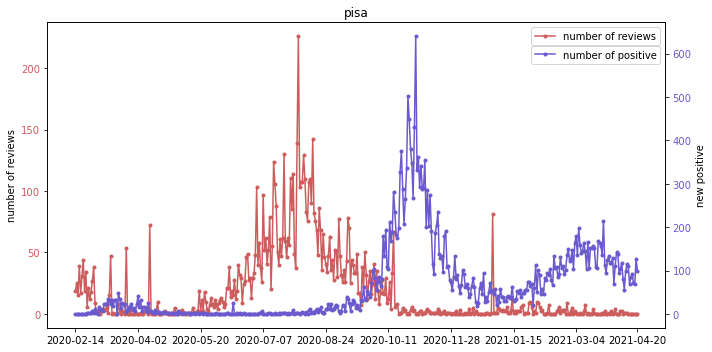

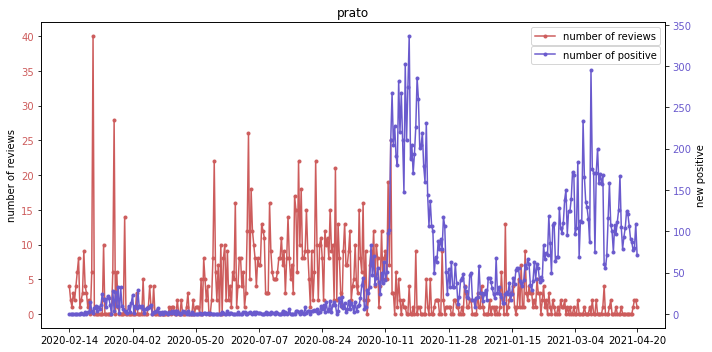

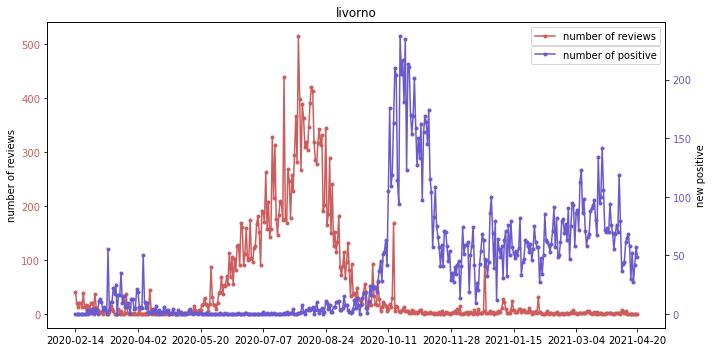

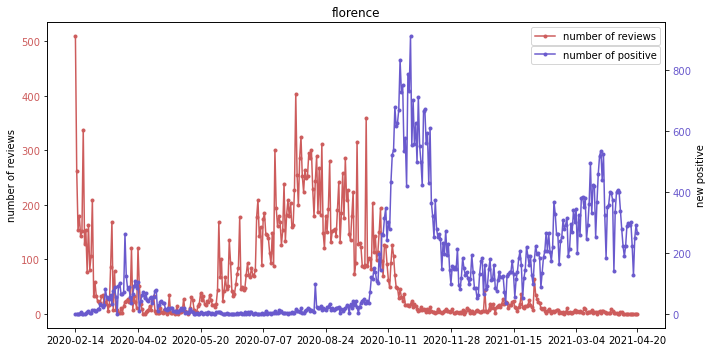

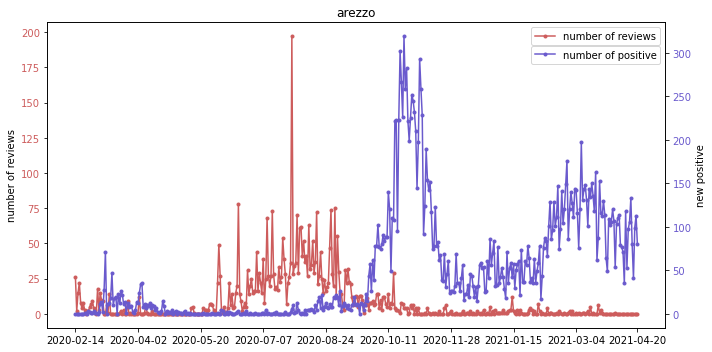

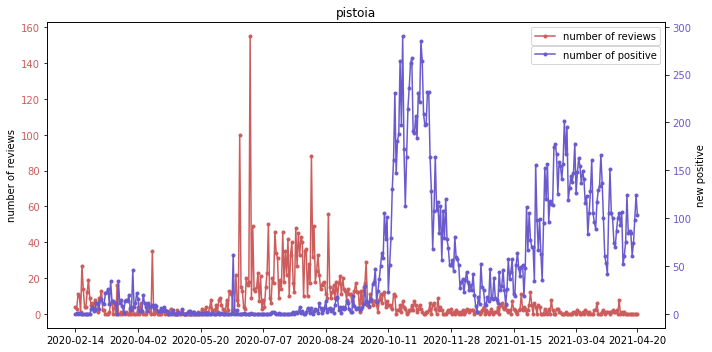

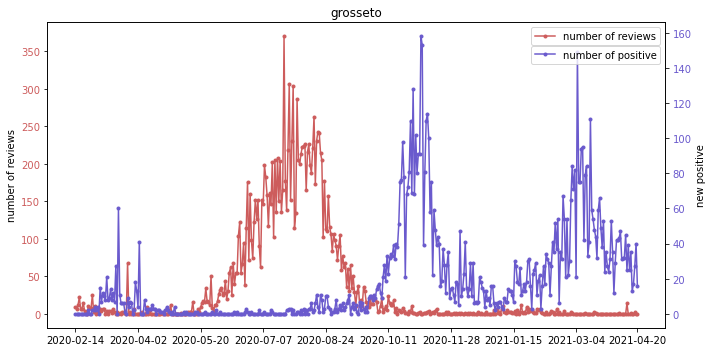

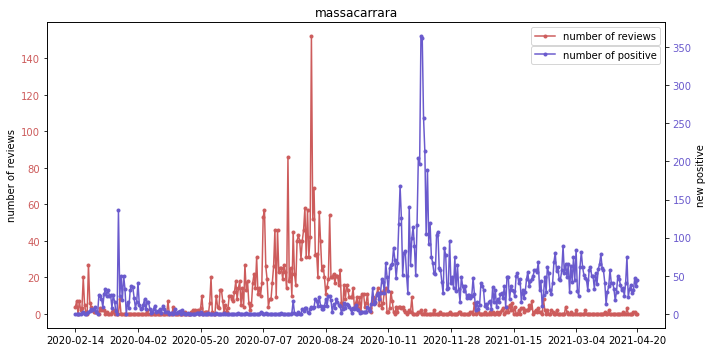

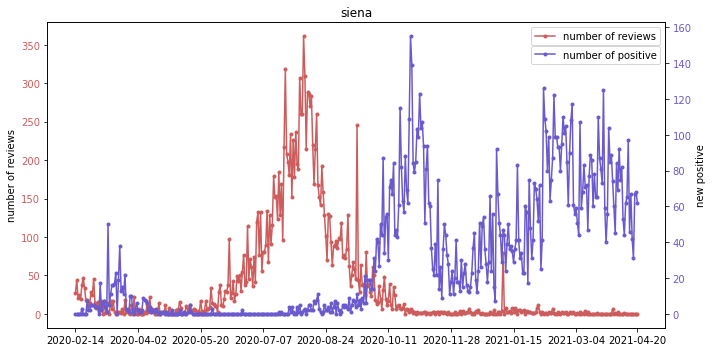

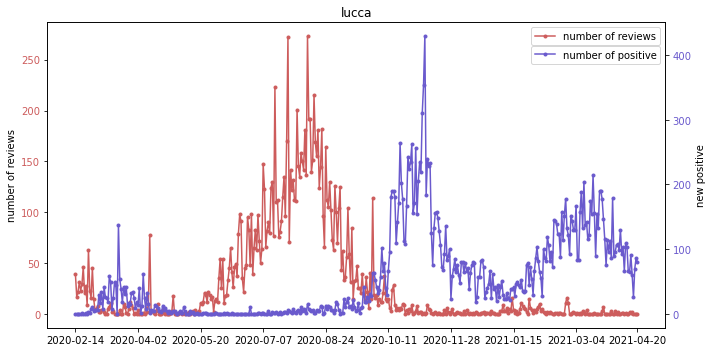

In [11]:

for i, province in enumerate(provinceTags):
    fig, ax1 = plt.subplots(figsize=(10,5))
    
    dates = [G.edges[(i,j,k)]['end'] for (i,j,k) in G.edges if G.nodes[j]['province'] == province ]
    
    counter = [0 for d in df.index]
    for d in dates : counter[d] += 1
    
    
    c1 = 'indianred'
    c2= 'slateblue'
    ax1.plot(counter,  marker='.',  c=c1, label='number of reviews')
    ax1.set_ylabel('number of reviews')
    ax1.tick_params(axis='y', labelcolor=c1)
    plt.legend()
    
    ax2 = ax1.twinx()
        
    ax2.plot(df[province+'-'+'new_positivi'],c=c2,  marker='.' ,label='number of positive')
    ax2.set_ylabel('new positive')
    ax2.tick_params(axis='y', labelcolor=c2)
    
    plt.xticks(tickslocs, tickslabels)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 0.94))
    plt.title(provinces[i])
    fig.tight_layout()
    plt.show()

#### ROLLING

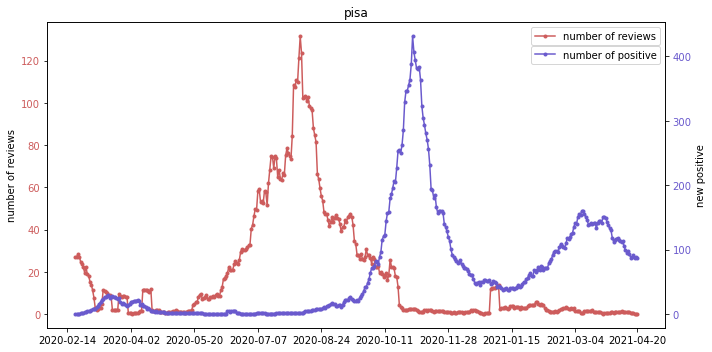

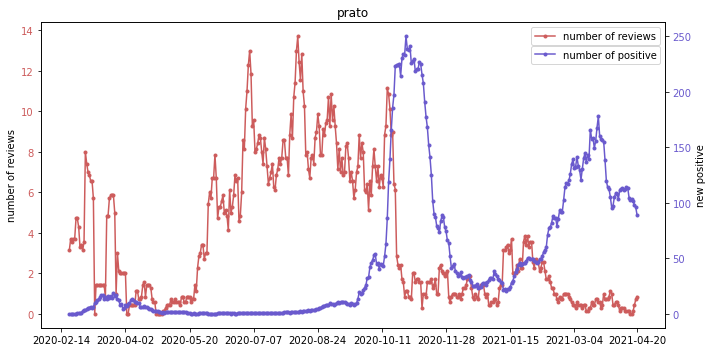

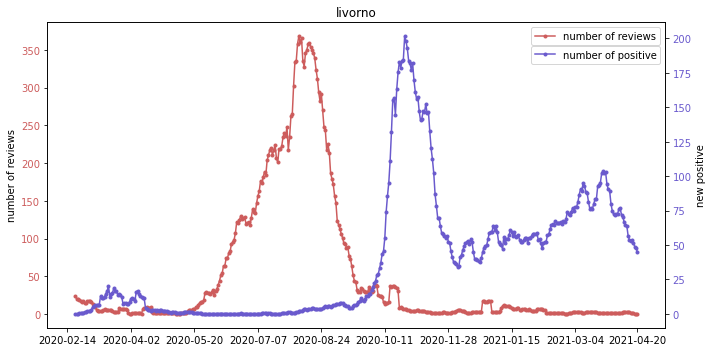

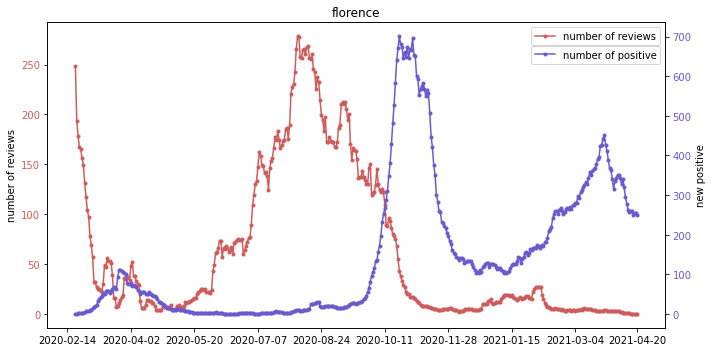

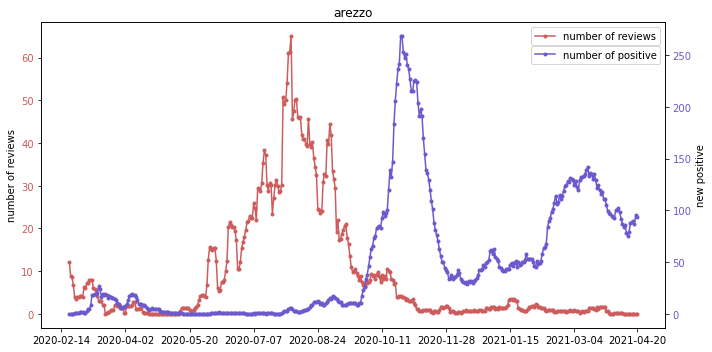

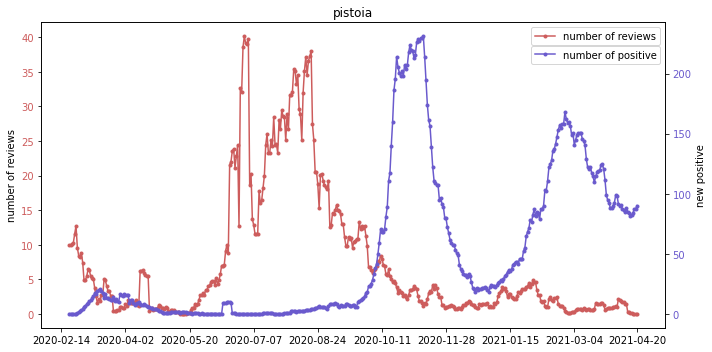

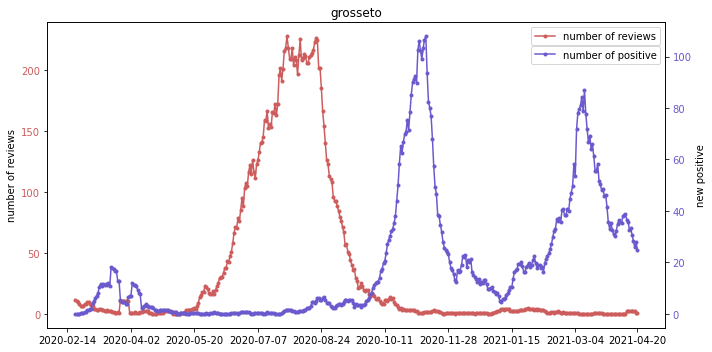

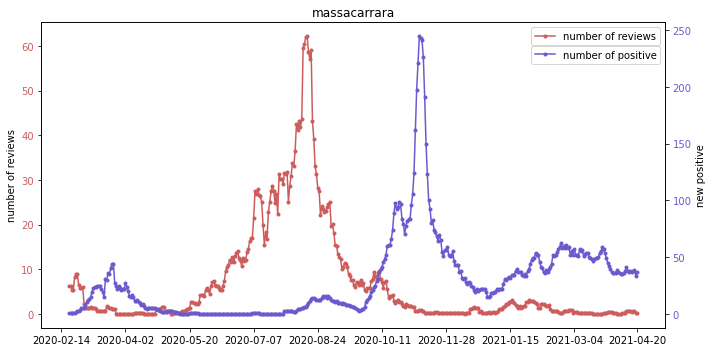

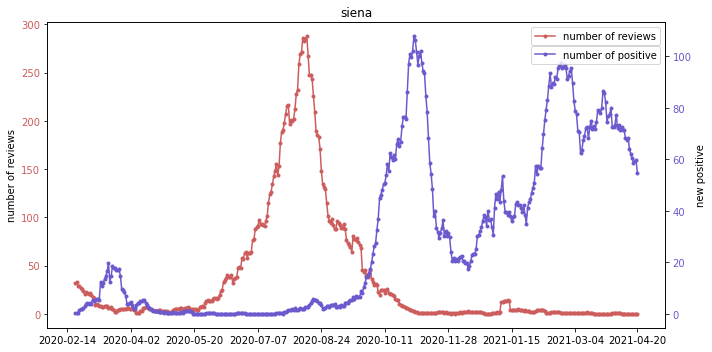

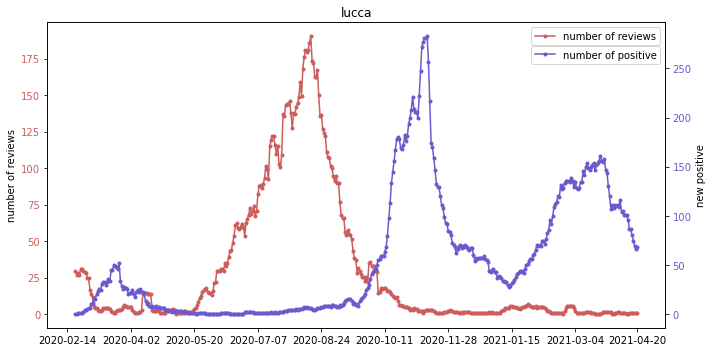

In [12]:

for i, province in enumerate(provinceTags):
    fig, ax1 = plt.subplots(figsize=(10,5))
    
    dates = [G.edges[(i,j,k)]['end'] for (i,j,k) in G.edges if G.nodes[j]['province'] == province ]
    
    counter = [0 for d in df.index]
    for d in dates : counter[d] += 1
    
    
    c1 = 'indianred'
    c2= 'slateblue'
    ts1 = pd.Series(counter)
    #(ts1 - ts1.mean())/ts1.std()
    counter = (ts1).rolling(window=7).mean()
    ax1.plot(counter,  marker='.',  c=c1, label='number of reviews')
    ax1.set_ylabel('number of reviews')
    ax1.tick_params(axis='y', labelcolor=c1)
    plt.legend()
    
    ax2 = ax1.twinx()
      
    ts2 = df[province+'-'+'new_positivi']
    #(ts2 - ts2.mean())/ts2.std()
    ax2.plot((ts2).rolling(window=7).mean(),c=c2,  marker='.' ,label='number of positive')
    ax2.set_ylabel('new positive')
    ax2.tick_params(axis='y', labelcolor=c2)
    
    plt.xticks(tickslocs, tickslabels)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 0.94))
    plt.title(provinces[i])
    fig.tight_layout()
    plt.show()

#### MOVING AVERAGE

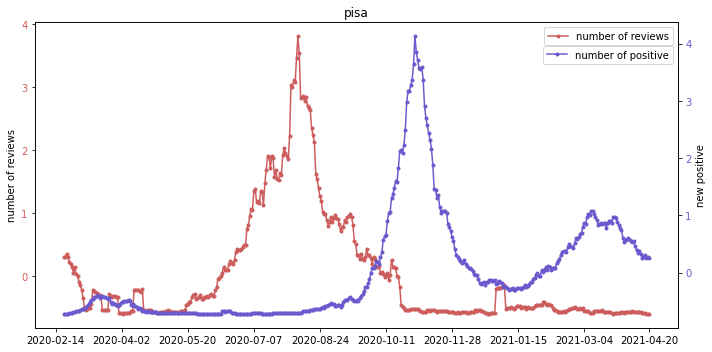

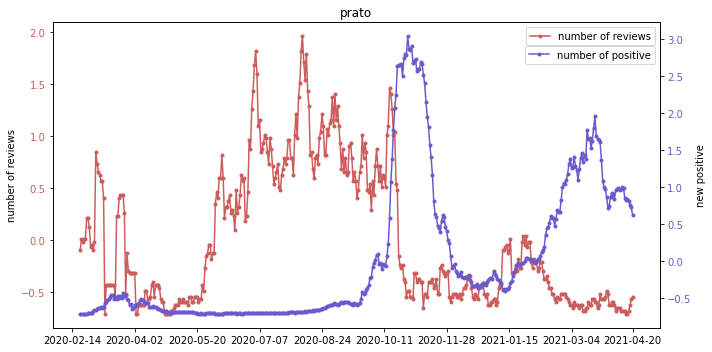

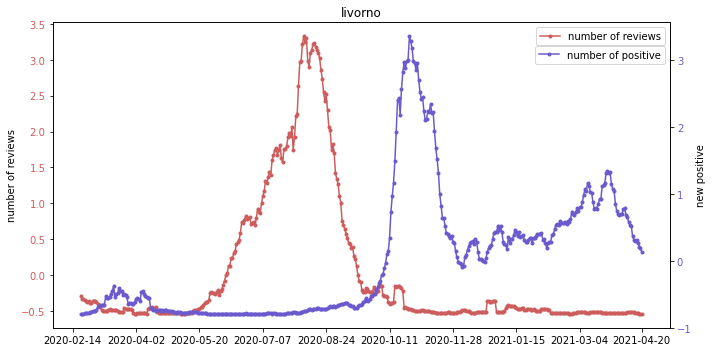

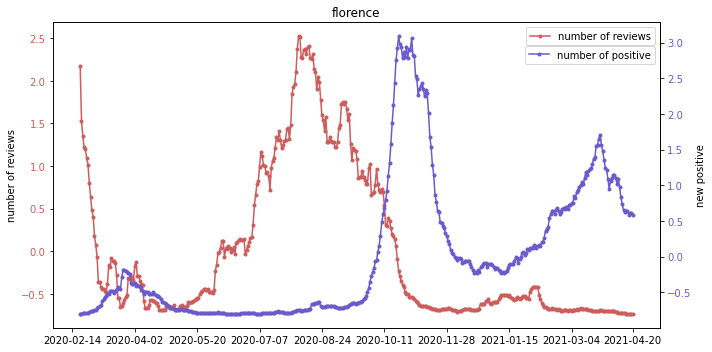

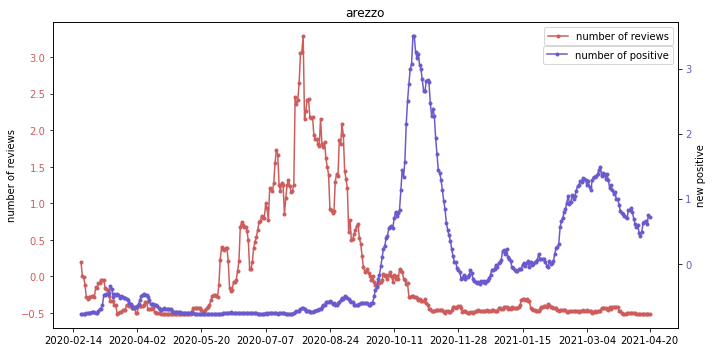

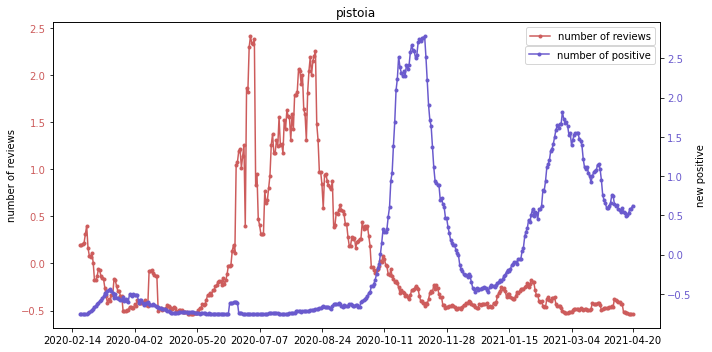

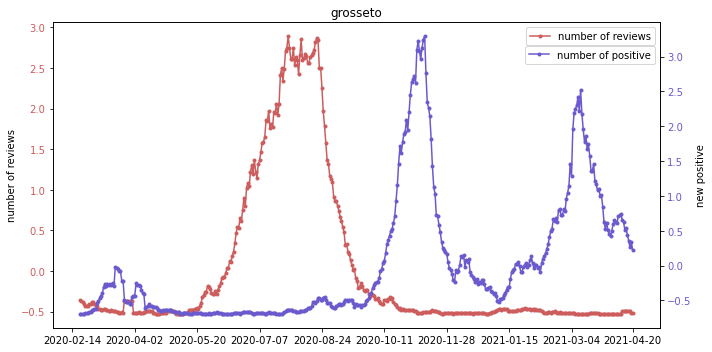

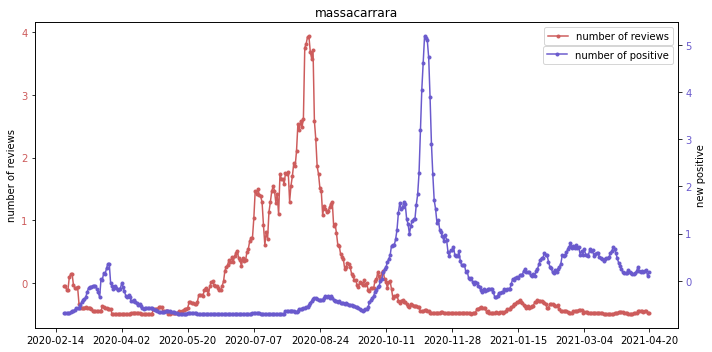

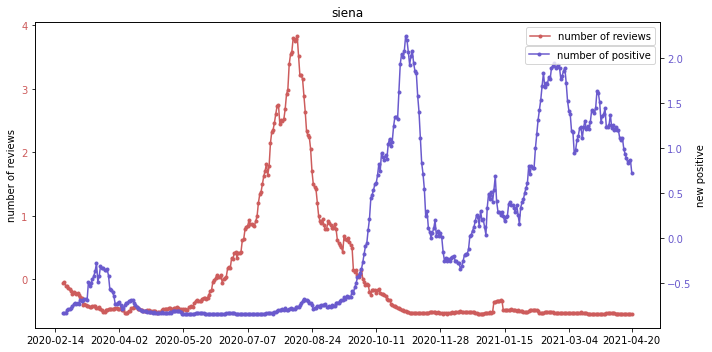

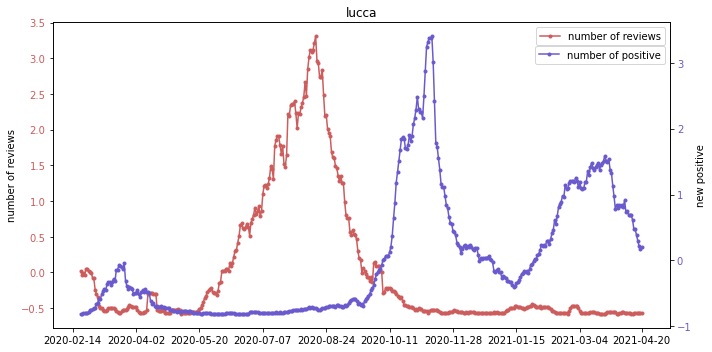

In [13]:

for i, province in enumerate(provinceTags):
    fig, ax1 = plt.subplots(figsize=(10,5))
    
    dates = [G.edges[(i,j,k)]['end'] for (i,j,k) in G.edges if G.nodes[j]['province'] == province ]
    
    counter = [0 for d in df.index]
    for d in dates : counter[d] += 1
    
    
    c1 = 'indianred'
    c2= 'slateblue'
    ts1 = pd.Series(counter)
    
    counter = ((ts1 - ts1.mean())/ts1.std()).rolling(window=7).mean()
    ax1.plot(counter,  marker='.',  c=c1, label='number of reviews')
    ax1.set_ylabel('number of reviews')
    ax1.tick_params(axis='y', labelcolor=c1)
    plt.legend()
    
    ax2 = ax1.twinx()
      
    ts2 = df[province+'-'+'new_positivi']
    #
    ax2.plot(((ts2 - ts2.mean())/ts2.std()).rolling(window=7).mean(),c=c2,  marker='.' ,label='number of positive')
    ax2.set_ylabel('new positive')
    ax2.tick_params(axis='y', labelcolor=c2)
    
    plt.xticks(tickslocs, tickslabels)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 0.94))
    plt.title(provinces[i])
    fig.tight_layout()
    plt.show()

#### find best lag

In [14]:
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from scipy.spatial.distance import cdist, euclidean

In [15]:
ts2 = sum([df[province+'-'+'new_positivi'] for province in provinceTags])

In [16]:
dtw(ts1[6:], ts2[6:])

15698.783774547632

In [17]:
euclidean(ts1[6:], ts2[6:])

17164.80203789138

In [18]:
from scipy.spatial.distance import euclidean, cityblock

distances = []
lags = []

for i, province in enumerate(provinceTags):
    
    
    dates = [G.edges[(i,j,k)]['end'] for (i,j,k) in G.edges if G.nodes[j]['province'] == province ]
    counter = [0 for d in df.index]
    for d in dates : counter[d] += 1
    ts1 = pd.Series(counter)
    ts1 = ((ts1 - ts1.mean())/ts1.std()).rolling(window=7).mean()
    ts1 = ts1[6:]
    
    ts2 = df[province+'-'+'new_positivi']
    ts2 = ((ts2 - ts2.mean())/ts2.std()).rolling(window=7).mean()
    ts2 = ts2[6:]
    
    distances.append( cityblock(ts1, ts2)/ len(ts1))
    lags.append(0)
    
    for lag in range(100):
        
        ts1 = ts1[:-1]
        ts2 = ts2[1:]
        
        dist = cityblock(ts1, ts2) / len(ts1)
        if dist  < distances[i]:
            distances[i] = dist
            lags[i] = lag
        
        

In [19]:
print(distances)
print(lags, np.mean(lags))

[0.574546231126146, 0.8366395067085155, 0.7191579753623469, 0.8210538815491933, 0.690669798399813, 0.7659101324406379, 0.7107172625685979, 0.521314229294693, 0.9331902998880691, 0.7185237558944638]
[84, 71, 78, 79, 83, 87, 88, 84, 97, 86] 83.7


In [20]:
print(distances)
print(lags, np.mean(lags))

[0.574546231126146, 0.8366395067085155, 0.7191579753623469, 0.8210538815491933, 0.690669798399813, 0.7659101324406379, 0.7107172625685979, 0.521314229294693, 0.9331902998880691, 0.7185237558944638]
[84, 71, 78, 79, 83, 87, 88, 84, 97, 86] 83.7


In [218]:
bestlag = 83

## Comparation

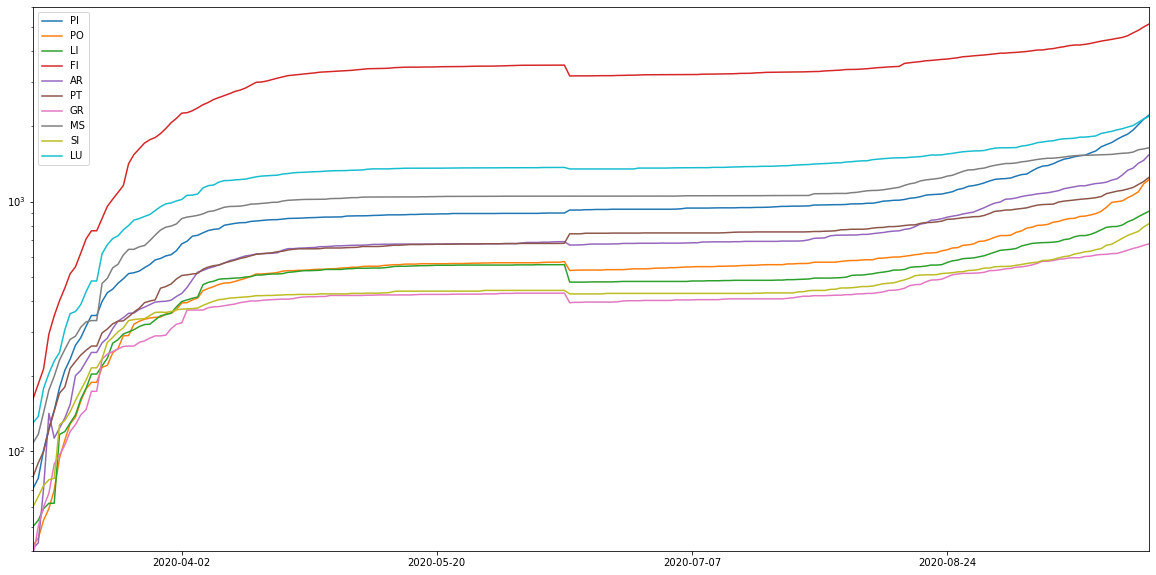

In [172]:
plt.figure(figsize=(20,10))
for p in provinceTags:
    plt.plot(df[p+'-'+'positivi'],label=p)
    
    plt.yscale('log')
    plt.xticks(tickslocs, tickslabels)
    plt.xlim(20,230)
    plt.ylim(40,6000)
plt.legend()

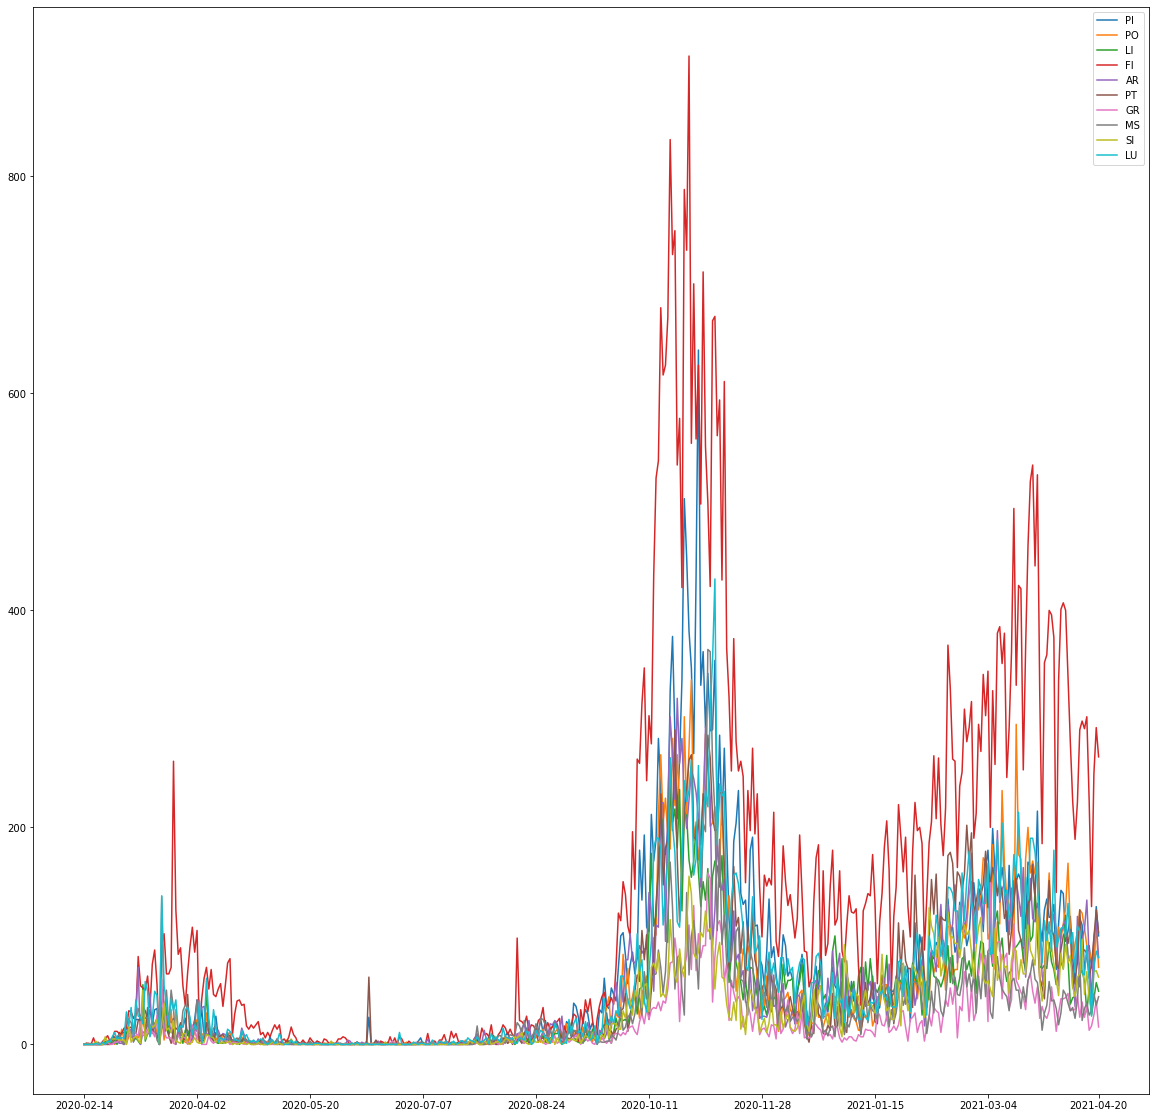

In [173]:
plt.figure(figsize=(20,20))
for p in provinceTags:
    plt.plot(df[p+'-'+'new_positivi'],label=p)
    plt.xticks(tickslocs, tickslabels)
    
plt.legend()

### Random Forest Regression 
Wetry to use reviews to rpedict positives 

In [29]:
bestlag = 83

In [30]:
provinceTags

['PI', 'PO', 'LI', 'FI', 'AR', 'PT', 'GR', 'MS', 'SI', 'LU']

In [31]:
DF

,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,AR-deceduti,...,PI-new_positivi,PO-new_positivi,LI-new_positivi,FI-new_positivi,AR-new_positivi,PT-new_positivi,GR-new_positivi,MS-new_positivi,SI-new_positivi,LU-new_positivi
index,,,,,,,,,,,,,,,,,,,,,
2020-02-14,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2020-02-15,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,...,0,0,0,1,0,1,0,0,0,0
2020-02-16,0,0.0,0,0.0,0,0.0,2,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
2020-02-17,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
2020-02-18,0,0.0,0,0.0,0,0.0,7,0.0,0,0.0,...,0,0,0,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,29133,697.0,22468,592.0,17432,416.0,67071,2190.0,22783,492.0,...,14,18,17,44,14,15,27,4,8,13
2021-06-01,29153,699.0,22492,593.0,17441,416.0,67099,2193.0,22791,495.0,...,20,24,9,28,8,13,16,3,14,11
2021-06-02,29162,700.0,22510,593.0,17449,416.0,67136,2194.0,22804,497.0,...,9,18,8,37,13,5,22,4,17,13


In [32]:
dftest = DF[432-6:432+bestlag ]
dftest

,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,AR-deceduti,...,PI-new_positivi,PO-new_positivi,LI-new_positivi,FI-new_positivi,AR-new_positivi,PT-new_positivi,GR-new_positivi,MS-new_positivi,SI-new_positivi,LU-new_positivi
index,,,,,,,,,,,,,,,,,,,,,
2021-04-15,27305,644.0,20166,491.0,16359,391.0,61112,1932.0,20475,406.0,...,84,91,30,302,133,84,35,38,67,91
2021-04-16,27396,648.0,20253,492.0,16411,391.0,61336,1938.0,20555,406.0,...,91,87,52,224,80,61,13,27,42,60
2021-04-17,27467,651.0,20330,498.0,16438,391.0,61463,1951.0,20596,407.0,...,71,77,27,127,41,74,17,31,31,26
2021-04-18,27535,652.0,20410,502.0,16480,392.0,61712,1955.0,20695,408.0,...,68,80,42,249,99,98,27,47,67,70
2021-04-19,27662,652.0,20519,505.0,16537,393.0,62004,1968.0,20808,409.0,...,127,109,57,292,113,124,40,36,68,86
2021-04-20,27762,653.0,20590,508.0,16586,393.0,62269,1984.0,20888,410.0,...,100,71,49,265,80,103,16,44,62,80
2021-04-21,27887,656.0,20702,510.0,16645,394.0,62515,1991.0,20951,410.0,...,125,112,59,246,63,80,14,35,81,80
2021-04-22,27972,657.0,20782,512.0,16690,394.0,62695,2003.0,21075,410.0,...,85,80,45,180,124,56,34,21,42,63
2021-04-23,28026,659.0,20815,515.0,16722,396.0,62878,2012.0,21140,410.0,...,54,33,32,183,65,70,9,28,53,43


data preparation

In [33]:
X_trains = []
y_trains = []
X_tests = []
y_tests = []

for province in provinceTags:
    
        counter = [0 for d in df.index]
        dates = [G.edges[(i,j,k)]['end'] for (i,j,k) in G.edges if G.nodes[j]['province'] == province]
        for d in dates: counter[d] += 1
            
        ts1 = pd.Series(counter)
        #(ts1 - ts1.mean())/ts1.std()
        ts1 = (ts1).rolling(window=7).mean()
        ts1 = ts1[6:]
        
        ts2 = df[province+'-'+'new_positivi']
        #(ts2 - ts2.mean())/ts2.std()
        ts2 = (ts2).rolling(window=7).mean()
        ts2 = ts2[6:]
        
      
        
        X_trains.append(ts1[:-bestlag])
        y_trains.append(ts2[bestlag:])
        
        
        ts2 = dftest[province+'-'+'new_positivi']
        #(ts2 - ts2.mean())/ts2.std()
        ts2 = (ts2).rolling(window=7).mean()
        ts2 = ts2[6:]
        
        X_tests.append(ts1[-bestlag:])
        y_tests.append(ts2)
        
        
            

In [46]:
y_tests

[index
 2021-04-21    95.142857
 2021-04-22    95.285714
 2021-04-23    90.000000
 2021-04-24    89.142857
 2021-04-25    89.571429
 2021-04-26    85.142857
 2021-04-27    78.000000
 2021-04-28    70.857143
 2021-04-29    66.857143
 2021-04-30    66.000000
 2021-05-01    61.857143
 2021-05-02    57.714286
 2021-05-03    52.142857
 2021-05-04    48.428571
 2021-05-05    42.714286
 2021-05-06    39.142857
 2021-05-07    34.714286
 2021-05-08    33.285714
 2021-05-09    30.285714
 2021-05-10    26.714286
 2021-05-11    26.428571
 2021-05-12    25.571429
 2021-05-13    24.428571
 2021-05-14    24.285714
 2021-05-15    22.142857
 2021-05-16    21.285714
 2021-05-17    18.142857
 2021-05-18    17.571429
 2021-05-19    15.142857
 2021-05-20    13.857143
 2021-05-21    13.000000
 2021-05-22    13.000000
 2021-05-23    13.428571
 2021-05-24    14.000000
 2021-05-25    12.857143
 2021-05-26    14.428571
 2021-05-27    15.571429
 2021-05-28    15.857143
 2021-05-29    15.571429
 2021-05-30    14.

In [37]:
for y in y_trains: print(np.shape(y))

(343,)
(343,)
(343,)
(343,)
(343,)
(343,)
(343,)
(343,)
(343,)
(343,)


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


    


regr = RandomForestRegressor(max_depth=34, warm_start=True, random_state=0)

for t in range(100):
    for X,y in zip(X_trains,y_trains):
    
        X = np.array(X).reshape(-1,1)
        y = np.array(y).reshape(-1,1)
        
        regr.fit(X, y)

    


    
    







<ipython-input-38-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
<ipython-input-38-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
<ipython-input-38-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators do

<ipython-input-38-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
<ipython-input-38-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
<ipython-input-38-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score




def absolute_percentage_error(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_pred)


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(absolute_percentage_error(y_true, y_pred))


def max_absolute_percentage_error(y_true, y_pred):
    return np.max(absolute_percentage_error(y_true, y_pred))


def total_absolute_percentage_error(y_true, y_pred):
    return np.sum(absolute_percentage_error(y_true, y_pred))


def evaluate(y_true, y_pred, ts):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAD': median_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'MAXAPE': max_absolute_percentage_error(y_true, y_pred),
        'TAPE': total_absolute_percentage_error(y_true, y_pred)
    }

In [50]:

tickslocs = []
tickslabels = []
for i,e in enumerate(list(y_trains[0].index)):
    if i%48 == 0: 
        tickslocs.append(i)
        tickslabels.append(e)

tickslocs.append(i)
tickslabels.append(e)
tickslabels

['2020-05-13',
 '2020-06-30',
 '2020-08-17',
 '2020-10-04',
 '2020-11-21',
 '2021-01-08',
 '2021-02-25',
 '2021-04-14',
 '2021-04-20']

In [49]:
len(y_trains)

10

MAE 84.401
RMSE 112.685
MAD 64.773
R2 -1.867
MAPE 2.860
MAXAPE 203.585
TAPE 980.890


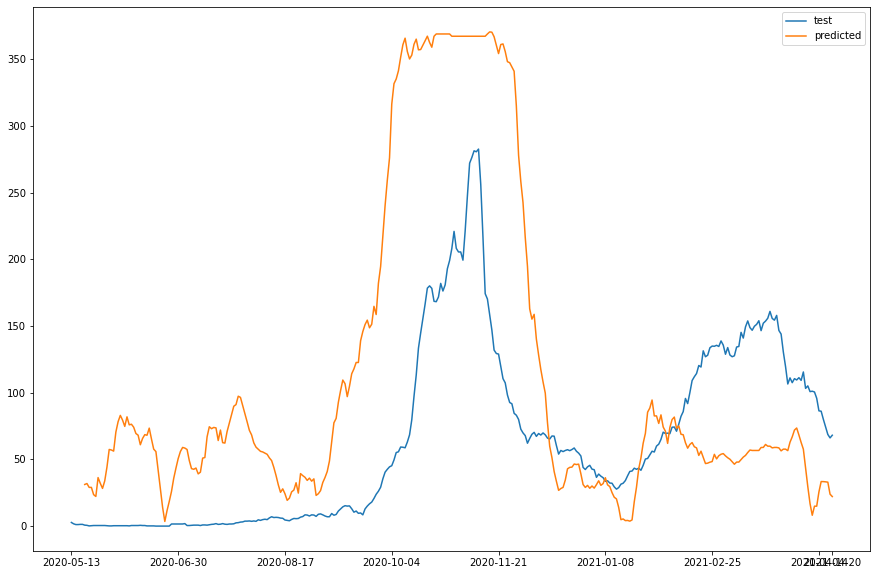

MAE 82.164
RMSE 108.832
MAD 64.802
R2 -1.670
MAPE nan
MAXAPE nan
TAPE 0.000


In [51]:
X_test = np.array(X_trains[-1]).reshape(-1,1)
y_test =  y_trains[-1]

y_pred = regr.predict(X_test)
for k, v in evaluate(y_test, y_pred, X_test).items():
    print('%s %.3f' % (k, v))

y_pred = pd.Series(y_pred).rolling(window=7).mean()

plt.figure(figsize=(15,10))
plt.plot(y_test,label = 'test')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.xticks(tickslocs, tickslabels)
plt.show()


for k, v in evaluate(y_test[6:], y_pred[6:], X_test[6:]).items():
    print('%s %.3f' % (k, v))



MAE 93.685
RMSE 146.354
MAD 39.360
R2 -18.154
MAPE 1.284
MAXAPE 50.292
TAPE 440.458


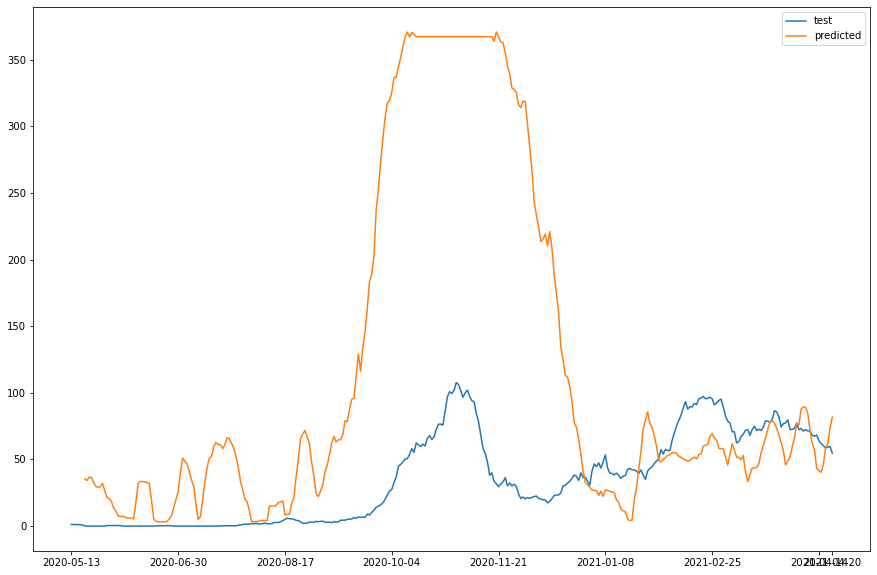

MAE 92.409
RMSE 145.080
MAD 33.706
R2 -17.844
MAPE nan
MAXAPE nan
TAPE 0.000


In [54]:
X_test = np.array(X_trains[-2]).reshape(-1, 1) 


y_test =  y_trains[-2]

y_pred = regr.predict(X_test)

for k, v in evaluate(y_test, y_pred, X_test).items():
    print('%s %.3f' % (k, v))
y_pred = pd.Series(y_pred).rolling(window=7).mean()

plt.figure(figsize=(15,10))
plt.plot(y_test,label = 'test')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.xticks(tickslocs, tickslabels)
plt.show()


for k, v in evaluate(y_test[6:], y_pred[6:], X_test[6:]).items():
    print('%s %.3f' % (k, v))

### Forecasting

In [57]:
len(y_tests[0])

45

In [58]:

tickslocs = []
tickslabels = []
for i,e in enumerate(list(y_tests[0].index)):
    if i%9 == 0: 
        tickslocs.append(i)
        tickslabels.append(e)

tickslocs.append(i)
tickslabels.append(e)
tickslabels

['2021-04-21',
 '2021-04-30',
 '2021-05-09',
 '2021-05-18',
 '2021-05-27',
 '2021-06-04']

MAE 44.359
RMSE 52.087
MAD 40.402
R2 -2.537
MAPE 3.230
MAXAPE 51.935
TAPE 145.361


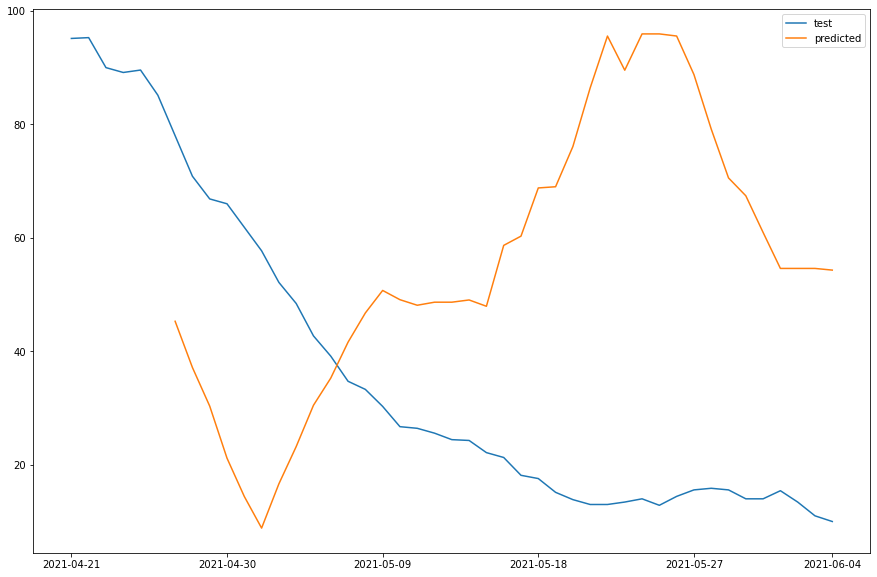

MAE 43.306

RMSE 48.460

MAD 42.155

R2 -5.314

MAPE nan

MAXAPE nan

TAPE 0.000

MAE 31.859
RMSE 39.930
MAD 26.669
R2 -1.534
MAPE 0.434
MAXAPE 1.033
TAPE 19.544


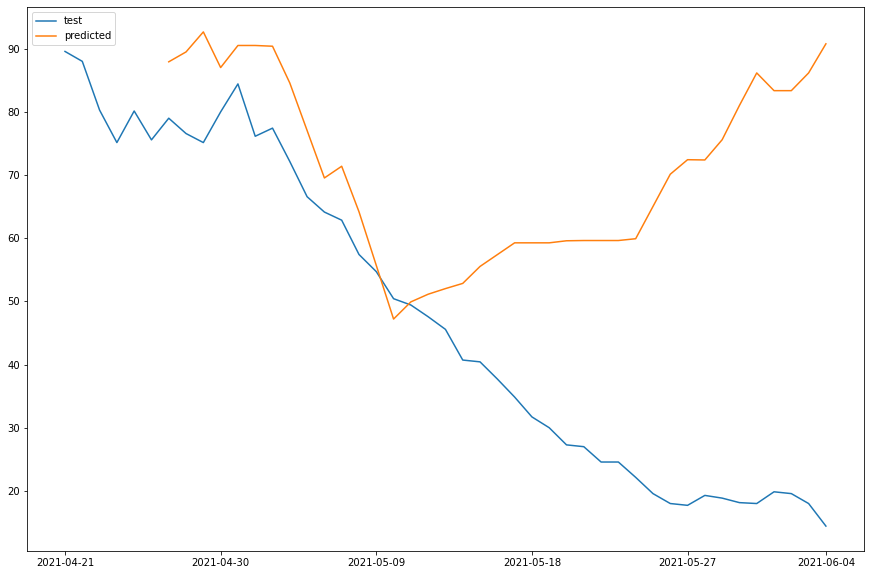

MAE 28.312

RMSE 36.324

MAD 19.689

R2 -1.537

MAPE nan

MAXAPE nan

TAPE 0.000

MAE 39.849
RMSE 44.150
MAD 33.745
R2 -9.168
MAPE 2.487
MAXAPE 27.051
TAPE 111.906


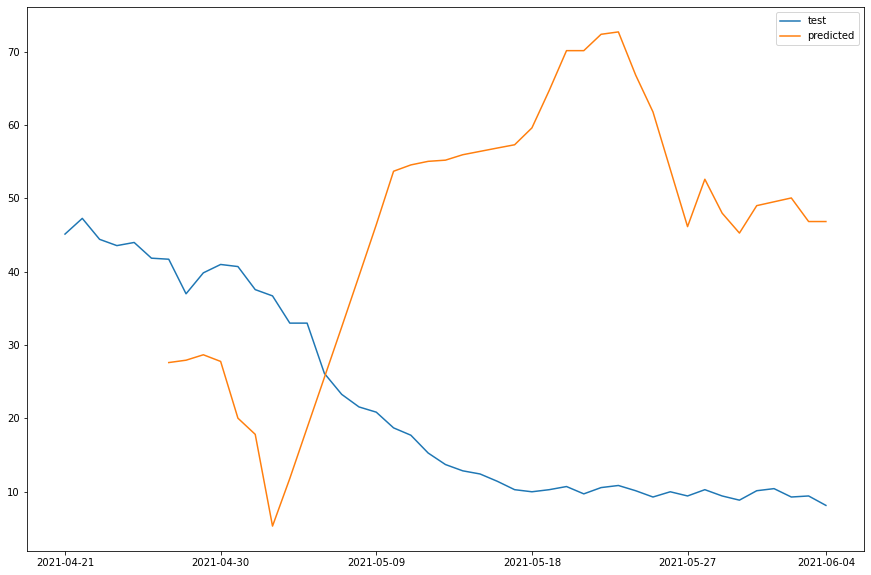

MAE 35.655

RMSE 39.152

MAD 38.712

R2 -10.654

MAPE nan

MAXAPE nan

TAPE 0.000

MAE 98.688
RMSE 121.184
MAD 127.337
R2 -2.606
MAPE 19.103
MAXAPE 138.419
TAPE 859.652


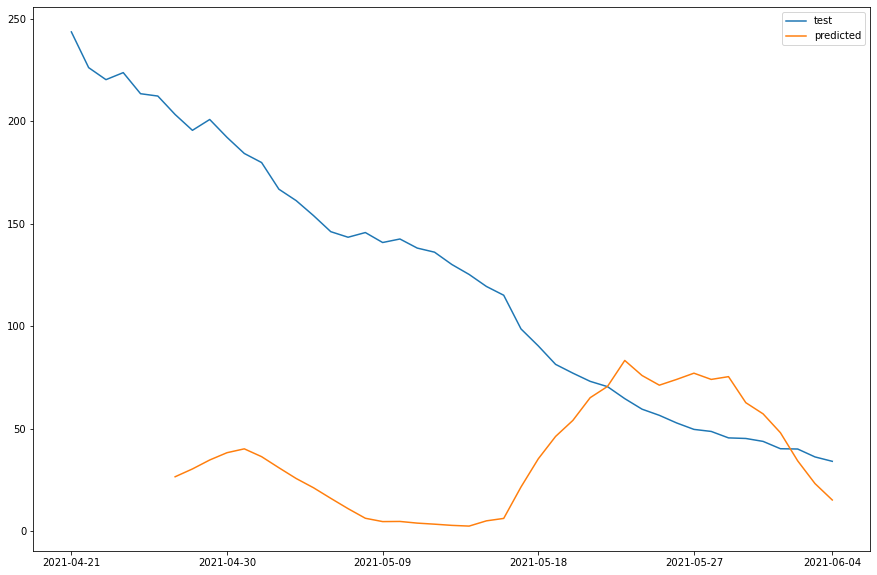

MAE 81.980

RMSE 101.790

MAD 108.848

R2 -2.540

MAPE nan

MAXAPE nan

TAPE 0.000

MAE 31.247
RMSE 36.775
MAD 29.519
R2 -0.963
MAPE 0.546
MAXAPE 3.528
TAPE 24.562


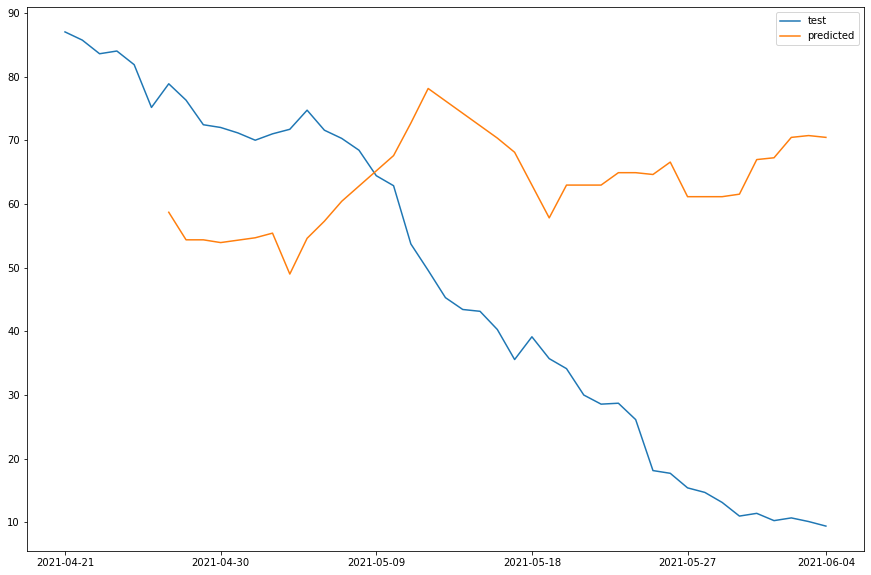

MAE 30.816

RMSE 34.850

MAD 29.137

R2 -1.098

MAPE nan

MAXAPE nan

TAPE 0.000

MAE 39.782
RMSE 46.903
MAD 43.678
R2 -2.646
MAPE 2.520
MAXAPE 58.338
TAPE 113.408


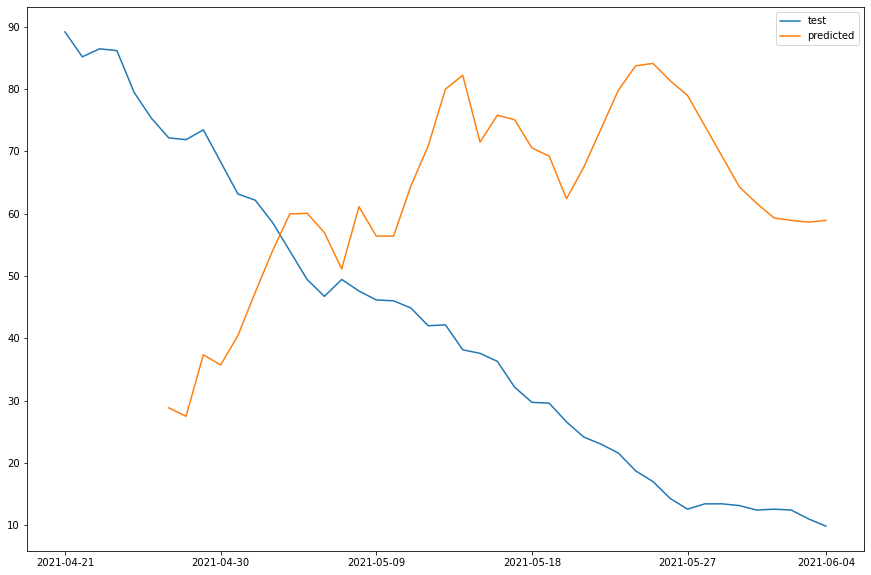

MAE 37.129

RMSE 41.617

MAD 40.811

R2 -3.458

MAPE nan

MAXAPE nan

TAPE 0.000

MAE 49.679
RMSE 55.770
MAD 50.719
R2 -153.317
MAPE 0.643
MAXAPE 0.854
TAPE 28.926


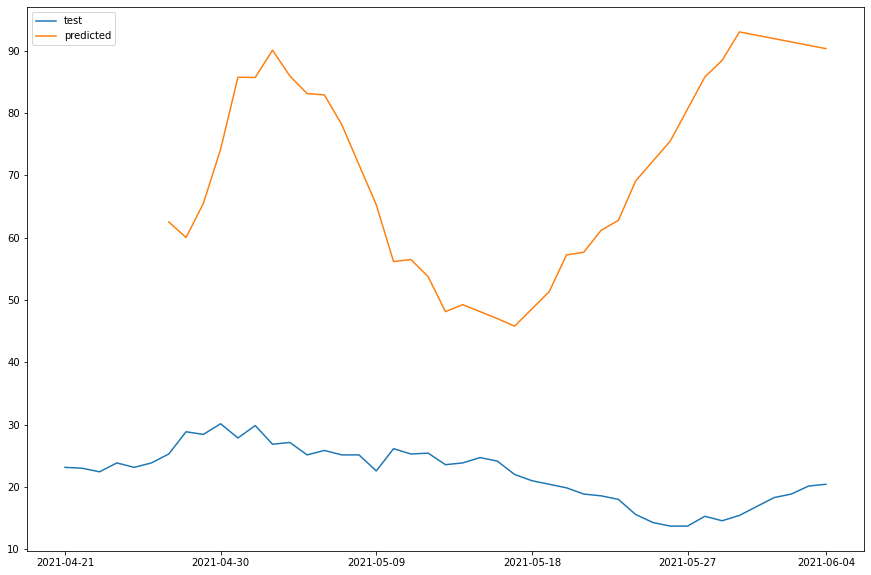

MAE 48.711

RMSE 51.734

MAD 46.581

R2 -115.329

MAPE nan

MAXAPE nan

TAPE 0.000

MAE 52.318
RMSE 57.612
MAD 62.576
R2 -24.791
MAPE 0.724
MAXAPE 0.965
TAPE 32.582


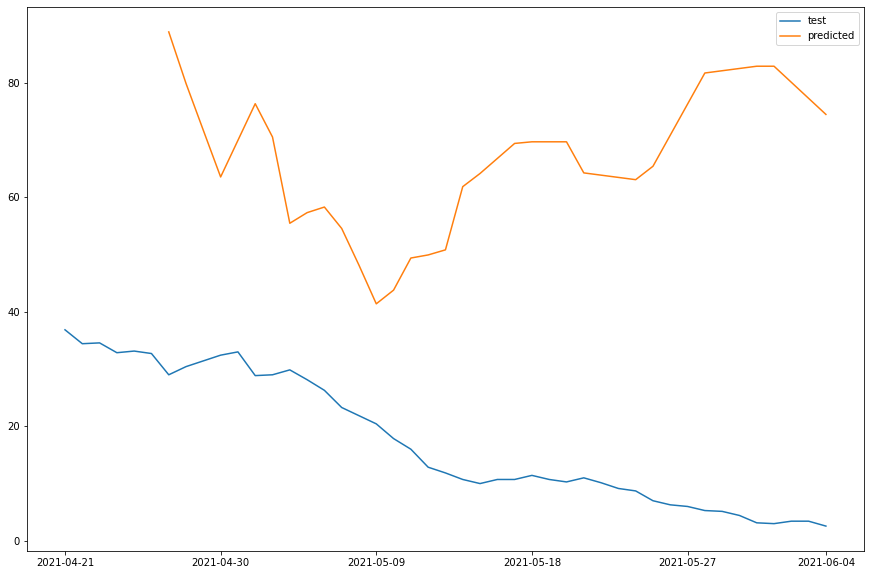

MAE 51.965

RMSE 54.794

MAD 54.162

R2 -29.122

MAPE nan

MAXAPE nan

TAPE 0.000

MAE 38.730
RMSE 41.841
MAD 41.438
R2 -6.184
MAPE 0.632
MAXAPE 2.460
TAPE 28.447


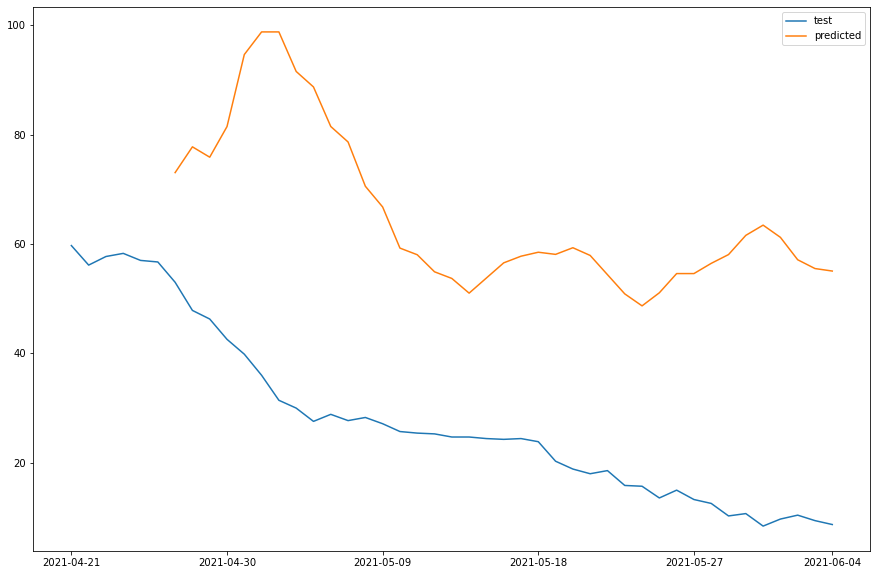

MAE 41.558

RMSE 42.993

MAD 39.624

R2 -13.609

MAPE nan

MAXAPE nan

TAPE 0.000

MAE 38.397
RMSE 42.532
MAD 36.380
R2 -4.198
MAPE 4.844
MAXAPE 32.404
TAPE 217.999


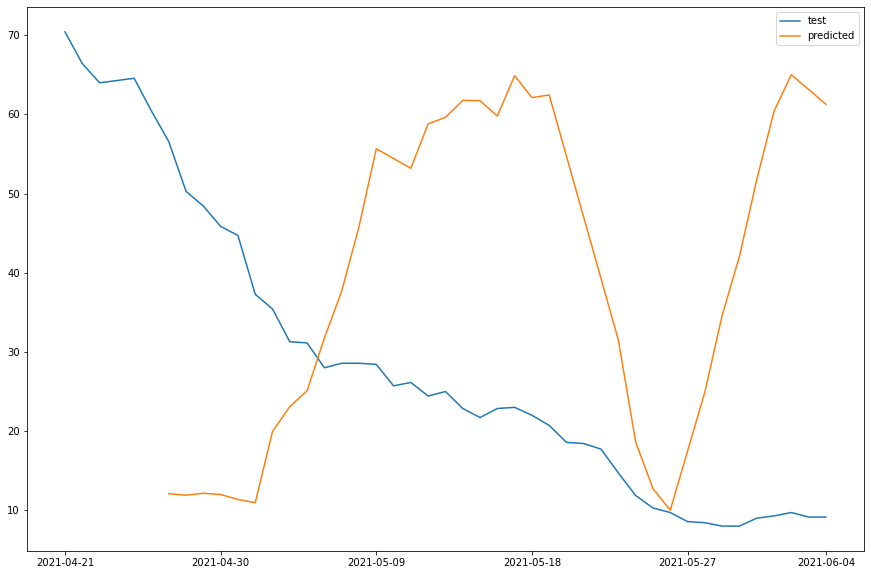

MAE 28.670

RMSE 32.426

MAD 33.350

R2 -5.247

MAPE nan

MAXAPE nan

TAPE 0.000



In [61]:
for X,y in zip(X_tests,y_tests):
    X_test = np.array(X[:len(y)]).reshape(-1, 1) 
    y_test = y
    y_pred = regr.predict(X_test)
    
    for k, v in evaluate(y_test, y_pred, X_test).items():
        print('%s %.3f' % (k, v))

    y_pred = pd.Series(y_pred).rolling(window=7).mean()

    plt.figure(figsize=(15,10))
    plt.plot(y_test,label = 'test')
    plt.plot(y_pred, label='predicted')
    plt.legend()
    plt.xticks(tickslocs, tickslabels)
    plt.show()


    for k, v in evaluate(y_test[6:], y_pred[6:], X_test[6:]).items():
        print('%s %.3f' % (k, v))
        print()